# Introduction à la phylogénie - Exercice

Cet exercice mettra en œuvre les concepts de phylogénie abordés durant le cours aujourd'hui à l'aide du langage de programmation R.

---

## Exercice : Construction d'un arbre phylogénétique avec R

À partir d'un fichier contenant les séquences ADN d'un groupe d'espèces fictives, vous allez utiliser les outils R appropriés pour manipuler les données, effectuer un alignement multiple, et construire un arbre.

Vous travaillerez sur un jeu de données génétiques concernant plusieurs espèces dans le but de construire, visualiser et interpréter un arbre phylogénétique. Les données sont des séquences d'ADN au format FASTA.

### Données
Un fichier nommé `sequences.fasta` contient les séquences d'ADN de 20 espèces fictives, voici un aperçu :

```R
>Espèce_1
TCCGGTTTGGTGTCATGTCTAGAAACATAATCGGAACACCTTTAAAGGGATGCCGAGCAATGTCATTCGCTGCCGCAATTCGGGCTGCCCCGCTACACACATGATCCACACATGCGTATTACCCCGAACGGATGCTGACCGCAATCTTTCGGTTACTTTGGATTGGGCGCCGGTACCCCCTTAGACCTGGGTTTCTGACGCCTGATCTCAAC
>Espèce_2
ACGCCTTAGCGACAAACATATGCCCCGCGCGAAGGGCTAGTCTCACCGCGCGTACGGGCTCTAACGGAAATCCCACCACCGTCGTCGTGAGAAACGCAACCTATTACCGGAAGCGTCCCCGAAAAGACCCAATACCTGTATTAACCGGTAACGCAACCCATTGCCCCCACCCCCCCTTAGCAACTAGCGAGTTACCTATAATTCATCTCTATCAGAATACCGGCGATAACAGGTTCGTCTAGGGAAGAGCCGCGCGCAGGGAGACCATTGGCTCATATCCATTAATTGCATTACCCACGCAGATCATATAAGCCAGCCATCATTCGTAAGCTTTGGGCTCTAGTATTCCTATACTCCGCAGAGACGCAACATCAGACCTAAGATGCCCGTCCAGGC
>Espèce_3
GTAGGAAATCTCCTTGTGAGGTACTTCTCGCAGTAAATCCATCAGTTGATAAGAGCCTATGGGGCATACAAGCCCATTGTAATCTCCGAAGCGTGTAGAACGTCTACCTTCTGTCGATAGACCTAAGATGTGAACGCCGACCCAGTCTTGATTGTCTCAAATAATAGGTCAAATGAGATATTCCGTGCAGTGGACTTCTCGTGCAATCTCTCTGCCGATACTCTGGCCGGAAATTTGAGCGGATCGGACGCGGGGGGGTGCAAGAAGCAGGGGACGGGTGGTACACCAATGAGACCGCCTAGAGCCTTCTCCCAGGAGGCCCCGTTCTAAGCAAGCGCGAGATCCTTCTAT
>Espèce_4
AAGAGTGGCGATTGCAGAACGAGCCGTACCCTCAGGAGTCCTCAGTGCAGGCCTTGAATCGGATTAAGATGCAGGTGCAGACGGCGAGCGTCTATACAGCCATACGATAGACGCGACATTTTTCCATTAACGCCTGGTTGGAGGTGACGGGTATGTGTCAAAGTCGCTGGTCGTCGCCAGGTACGTCCTCAGCCATCATCATGCTTTA
>Espèce_5
TAGGTCGTTCAGAGATTAGTGGCCCAGTTATAAGCTGAACGCTAGGACTAAGATGCTTCCTAAAAATACCCCTCCGTATCGGTGTGGAGACGTCGAACGTACGAGATTGCTTGAACACGTCCCAGAGTACAACCCTTTACGGGGCAACGGACTCTATTCACTGATTCTCCCGTTTCTGATGTAATATGAATGTATGAGCGGTGAGCTTGAATTATCTGAGCCCACACCGCCGCCAAACTATCGTCTACCTAGGTAGATCCCGATTCAACCAGGCAATTCCGCAGCGGCTGAGACTCACCGAACTCTAACAGACTACCAAATTAAACGCAACTGAAAA
...

### 1) Préparation des données
Téléchargez le fichier nécessaire :
* Un fichier FASTA contenant des séquences ADN (`sequences.fasta`).

Installez les bibliothèques nécessaires :
* **`ape`**
* **`phangorm`**

In [109]:
# Installation des librairies nécessaires
install.packages(c("ape", "phangorn"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### 2) Lecture manuelle de fichier FASTA

Essayons d'abord de lire le fichier contenant les séquences sans bibliothèques extérieures :

In [24]:
# Charger le fichier FASTA
fichier_fasta <- readLines("sequences.fasta")

# Initialiser des vecteurs pour stocker les identifiants et les séquences
ids <- c()
sequences <- c()

# Boucle à travers les lignes pour extraire les identifiants et les séquences
for (line in ...) {
  if (grepl("^>", ...)) {
    # Extraire l'identifiant (enlever le '>')
    id <- sub("^>", "", ...)
    ids <- c(ids, id)
  } else {
    # Extraire la séquence
    ... <- c(sequences, line)
  }
}

# Créer un tableau de données avec les identifiants et les séquences
fasta_df <- data.frame(id = ..., sequence = ...)

# Afficher les premières lignes du tableau
print(...(fasta_df))

        id
1 Espèce_1
2 Espèce_2
3 Espèce_3
4 Espèce_4
5 Espèce_5
6 Espèce_6
                                                                                                                                                                                                                                                                                                                                                                                                      sequence
1                                                                                                                                                                                         TCCGGTTTGGTGTCATGTCTAGAAACATAATCGGAACACCTTTAAAGGGATGCCGAGCAATGTCATTCGCTGCCGCAATTCGGGCTGCCCCGCTACACACATGATCCACACATGCGTATTACCCCGAACGGATGCTGACCGCAATCTTTCGGTTACTTTGGATTGGGCGCCGGTACCCCCTTAGACCTGGGTTTCTGACGCCTGATCTCAAC
2 ACGCCTTAGCGACAAACATATGCCCCGCGCGAAGGGCTAGTCTCACCGCGCGTACGGGCTCTAACGGAAATCCCACCACCGTCGTCGTGAGAAACGCAACCTATTACCGGAAGCGTCCCCGAA

In [25]:
# 1. Combien de séquences sont contenues dans le fichier `sequences.fasta`?
nb_sequences <- ...
print(paste("Nombre de séquences :", nb_sequences))

[1] "Nombre de séquences : 20"


In [30]:
# 2. Quelle est la longueur moyenne des séquences ?
longueur_moyenne <- ...
print(paste("Longueur moyenne des séquences :", longueur_moyenne, "caractères"))

[1] "Longueur moyenne des séquences : 348.85 caractères"


In [31]:
# 3. Combien de caractères contient la plus courte séquence ? La plus longue ?
longueur_sequences <- ...
plus_courte <- ...(longueur_sequences)
plus_longue <- ...(longueur_sequences)
print(paste("Longueur de la plus courte séquence :", plus_courte, "caractères"))
print(paste("Longueur de la plus longue séquence :", plus_longue, "caractères"))

[1] "Longueur de la plus courte séquence : 206 caractères"
[1] "Longueur de la plus longue séquence : 495 caractères"


In [41]:
# 4. Calculez la composition en nucléotides des séquences (proportion de A, C, T, G)
proportions <- ...(unlist(strsplit(fasta_df$..., ""))) / sum(...)

# Afficher les proportions
print("Proportion de nucléotides :")
print(proportions)

[1] "Proportion de nucléotides :"

        A         C         G         T 
0.2478142 0.2572739 0.2466676 0.2482442 


In [124]:
# 6. Écrivez une fonction pour détecter la présence de caractères non valides (autre que A, C, T, G ou N)
check_non_valide <- ...(...) {
  # On peut utiliser la fonction `grepl` pour chercher une série de caractères en sachant que "^" inverse la correspondance
  invalide <- ...("[^ATCGN]", ...)
  if (any(invalide)) {
    warning("Certaines séquences contiennent des caractères non-ATCG ou N :")
    # Donnez la séquence contenant des caractères non valides
    return(sequences[which(...)])
  }
  print("Aucun caractère invalide détecté")
}

# Testez la fonction
check_non_valide(c("ACTTGTXASXTT", "ACTGATGT", "TATAT"))
check_non_valide(fasta_df$sequence)

Warning message in check_non_valide(c("ACTTGTXASXTT", "ACTGATGT", "TATAT")):
“Certaines séquences contiennent des caractères non-ATCG ou N :”


[1] "ACTTGTXASXTT"

[1] "Aucun caractère invalide détecté"


### 3) Lecture du fichier FASTA avec une bibliothèque spécialisée

La bibliothèque **`ape`** simplifie considérablement la lecture des fichiers FASTA. *Elle* inclue une fonction `read.dna` qui :
* Vérifie automatiquement la validité des séquences
* Fournit des statistiques intégrées
* Crée un objet optimisé pour les analyses phylogénétiques

In [42]:
# Charger la bibliothèque `ape`
library(ape)

# Importation des séquences ADN
sequences <- read.dna("sequences.fasta", format = "fasta")

# Résumé du fichier
sequences

20 DNA sequences in binary format stored in a list.

Mean sequence length: 348.85 
   Shortest sequence: 206 
    Longest sequence: 495 

Labels:
Espèce_1
Espèce_2
Espèce_3
Espèce_4
Espèce_5
Espèce_6
...

Base composition:
    a     c     g     t 
0.248 0.257 0.247 0.248 
(Total: 6.98 kb)

In [59]:
# 5. Vérifiez si le fichier contient des séquences en double
doublons <- duplicated(as.character(...))
sum(...)

[1] 0

### 4) Alignement des séquences

L'alignement est une étape cruciale qui permet de préparer les séquences pour l'analyse phylogénétique.

Nous utilisons l'outil **Clustal** pour l'alignement. Pour ce faire, suivez les étapes suivantes :


Alignez les séquences ADN avec l'outil [Clustal](https://www.genome.jp/tools-bin/clustalw)
1. Assurez-vous de bien sélectionner l'option "DNA".
2. Changez l'option "Output Format" à "FASTA"
3. Chargez le fichier `sequences.fasta` en cliquant sur le bouton "Choose file" ou en copiant/collant la totalité du contenu du fichier.
4. Une fois cela fait, cliquez sur le bouton "Execute Multiple Alignment"
5. Descendez jusqu'à la ligne disant "Fasta-Alignment file created [clustalw.fasta]" et téléchargez le fichier `clustalw.fasta`en cliquant dessus.
6. Ensuite, glissez-le vers la section "Fichier" de Google Collab (comme plus tôt avec `sequences.fasta`)




In [65]:
# Lire l'alignement
alignement <- read.dna("clustalw.fasta", format = "...")

# Affichage de l'alignement
alignement

20 DNA sequences in binary format stored in a matrix.

All sequences of same length: 524 

Labels:
Espece_1
Espece_17
Espece_4
Espece_6
Espece_18
Espece_19
...

Base composition:
    a     c     g     t 
0.248 0.257 0.247 0.248 
(Total: 10.48 kb)

* On voit bien que, maintenant que les séquences on été alignées, elles ont toutes la même longueur.

*A) Pourquoi est-il important que les séquences soient alignées avant l'analyse phylogénétique?*

In [79]:
# Conversion de l'alignement en matrice phylogénétique
matrice_alignement <- as.matrix(...)

# Imprimez les premières lignes de la matrice
head(...)

# Vérifiez ses dimensions
print(dim(...))

[1]  20 524


6 DNA sequences in binary format stored in a matrix.

All sequences of same length: 524 

Labels:
Espece_1
Espece_17
Espece_4
Espece_6
Espece_18
Espece_19

Base composition:
    a     c     g     t 
0.258 0.247 0.250 0.245 
(Total: 3.14 kb)

*B) Que représentent les dimensions de la matrice ?*

* On peut calculer une matrice de distances génétiques avec `dist.dna` donnant, pour chaque paire de séquences, le pourcentage de positions où les nucléotides sont différents.

In [80]:
# Calcul des distances génétiques
dist_matrice <- dist.dna(..., model = "raw")
print(dist_matrice)

           Espece_1 Espece_17  Espece_4  Espece_6 Espece_18 Espece_19  Espece_2
Espece_17 0.5542169                                                            
Espece_4  0.5903614 0.6325301                                                  
Espece_6  0.6024096 0.6867470 0.5783133                                        
Espece_18 0.6445783 0.5963855 0.6445783 0.6566265                              
Espece_19 0.6144578 0.6807229 0.6566265 0.6927711 0.7048193                    
Espece_2  0.6686747 0.7168675 0.7409639 0.7409639 0.7108434 0.7409639          
Espece_3  0.6325301 0.6325301 0.7108434 0.7108434 0.6626506 0.7048193 0.7108434
Espece_8  0.6807229 0.7048193 0.7168675 0.6626506 0.7349398 0.7168675 0.6927711
Espece_10 0.7048193 0.7530120 0.6927711 0.6867470 0.6385542 0.6746988 0.6746988
Espece_13 0.6807229 0.7108434 0.6927711 0.7228916 0.7048193 0.7228916 0.7710843
Espece_5  0.7108434 0.7650602 0.7048193 0.6746988 0.6987952 0.7108434 0.7048193
Espece_16 0.6566265 0.6084337 0.6566265 

### 5) Construction de l'arbre phylogénétique

* **Méthode UPGMA** - L'UPGMA est une méthode simple mais peut être moins précise car elle suppose un taux d'évolution constant.


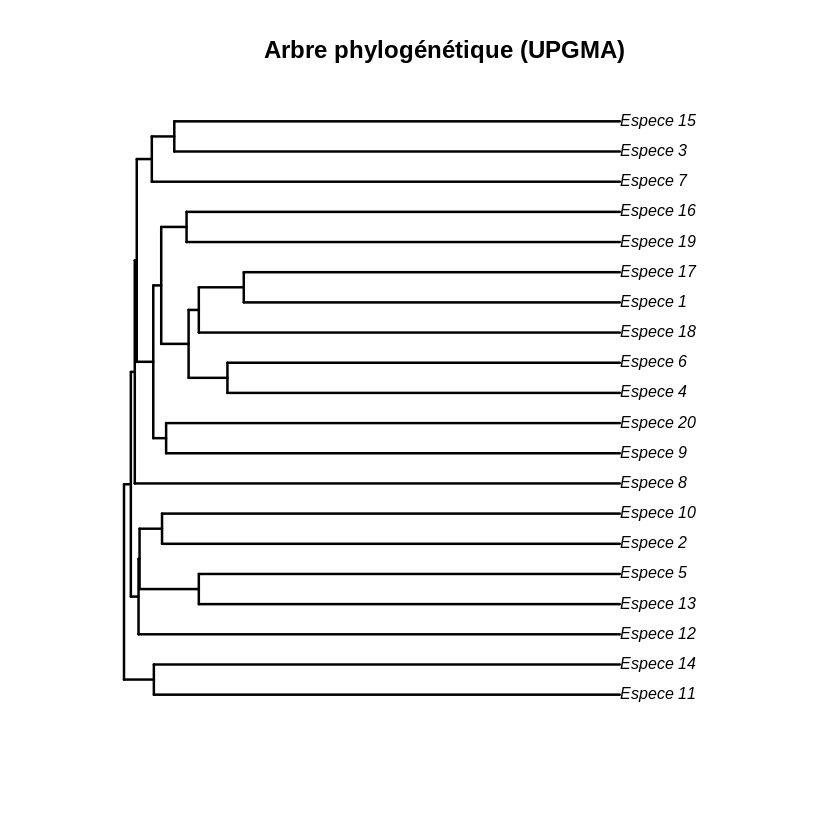

In [126]:
arbre_upgma <- upgma(dist_matrice)
plot(..., main = "Arbre phylogénétique (UPGMA)",cex = 0.8, edge.width = 2)

*C) Combien de feuilles comprend cet arbre ?*

*D) Donnez deux exemples de clades contenues dans l'arbre*

*E) Donnez un exemple de groupe monophylétique comprenant plus de 5 espèces*

*F) Donnez un exemple de groupe paraphylétique*

*G) Donnez un exemple de groupe polyphylétique*

*H) L'arbre comprend-il une polytomie ?*

* **Méthode NJ (Neighbour-Joining)** - Le NJ est plus robuste car il ne suppose pas un taux d'évolution constant.

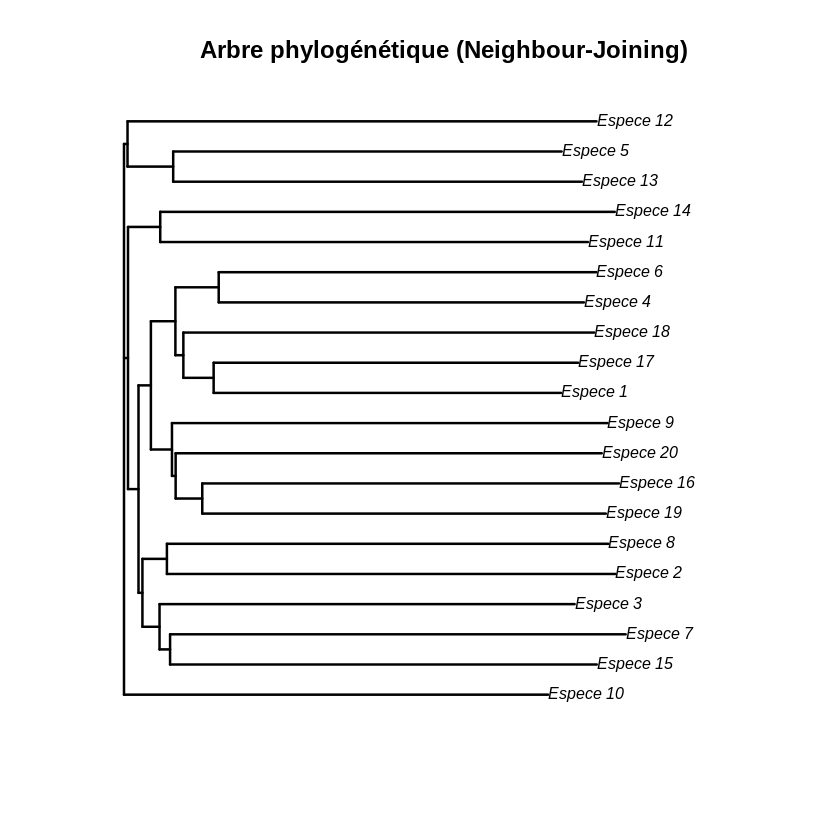

In [129]:
arbre_nj <- nj(dist_matrice)
plot(..., main = "Arbre phylogénétique (Neighbour-Joining)",cex = 0.8, edge.width = 2)

* **Méthode maximum de vraisemblance (ML)** - Cette méthode est la plus sophistiquée et prend en compte les modèles d'évolution moléculaire.

Pour cette méthode, nous allons utiliser la fonction `pml` de la bibliothèque **`phytools`** pour estimer l'arbre de maximum de vraisemblance.


optimize edge weights:  -10615.43 --> -9473.682 
optimize edge weights:  -9473.682 --> -9473.637 
optimize edge weights:  -9473.637 --> -9473.635 
optimize edge weights:  -9473.635 --> -9473.635 


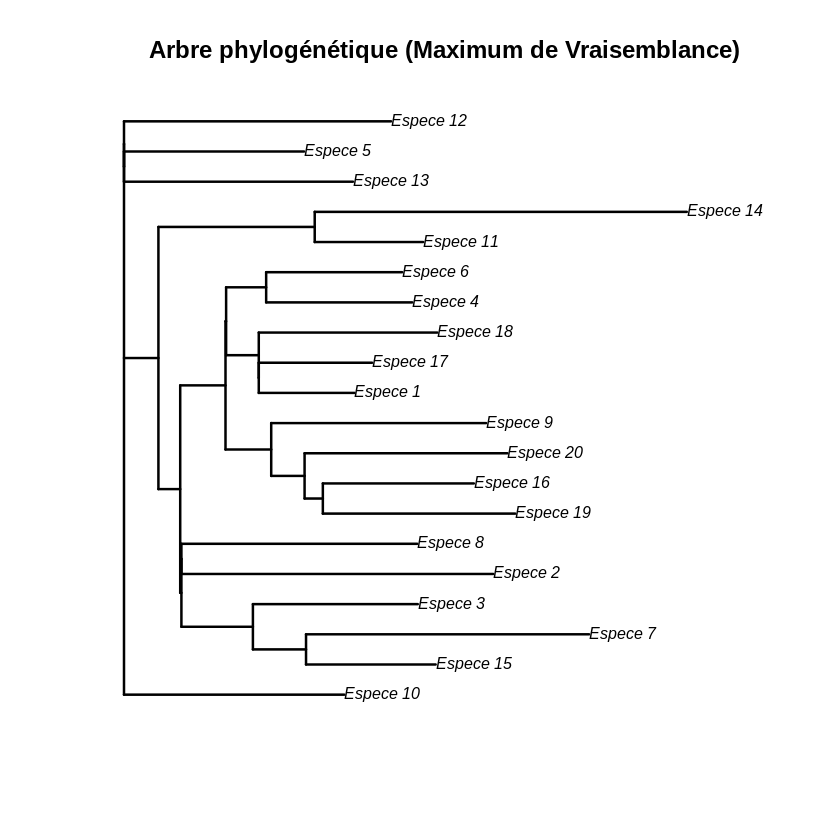

In [143]:
library(phangorn)

arbre_ml <- ...(tree = arbre_nj, data = phyDat(matrice_alignement))
arbre_ml <- optim.pml(arbre_ml)
plot(...$tree, main = "Arbre phylogénétique (Maximum de Vraisemblance)",cex = 0.8, edge.width = 2)

*I) Comparez les longueurs de branches entre les trois méthodes. Quelles sont les principales différences observées ?*